#### 참고 : tensorflow.keras 공식 문서 (Official API Docs) @ https://www.tensorflow.org/api_docs/python/tf/keras

<br>

## 1. Data loading & preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

In [ ]:
# datasets.load

In [2]:
datasets.load_boston().keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
# print(datasets.load_boston()['DESCR'])

In [7]:
# datasets.load_boston().data

In [3]:
df = pd.DataFrame(datasets.load_boston().data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
x_data = datasets.load_boston().data 
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)

sc = preprocessing.StandardScaler() # Apply standard scaling on x_data
x_data = sc.fit_transform(x_data)

print(x_data.shape)
print(y_data.shape)

(506, 13)
(506,)


<br>

## 2. Devide dataframe into X & Y -> Train X / Test X / Train Y / Test Y

In [5]:
from sklearn import model_selection
train_data, test_data, train_label, test_label = model_selection.train_test_split(x_data, y_data,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(354, 13)
(152, 13)
(354,)
(152,)


<br>

## 3. Build & Train the model 

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [7]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=13, units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # elu or relu (or layers.ELU / layers.LeakyReLU)

model.add(layers.Dense(units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=32, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))
model.add(layers.Dropout(rate=0.4))

model.add(layers.Dense(units=1, activation=None)) 

In [8]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.mean_squared_error, 
              metrics=[metrics.mean_squared_error]) 

In [9]:
history = model.fit(train_data, train_label, batch_size=100, epochs=1000, validation_split=0.3, verbose=0) 

In [10]:
result = model.evaluate(test_data, test_label)

print('loss (mean_squared_error) :', result[0])

5/5 [==============================] - 0s 1ms/step - loss: 16.9282 - mean_squared_error: 16.9282
loss (mean_squared_error) : 16.928237915039062


In [11]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

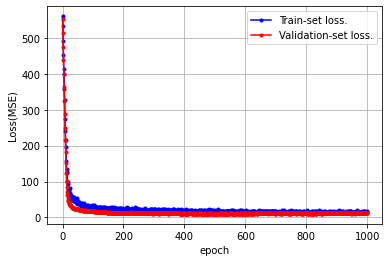

In [12]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

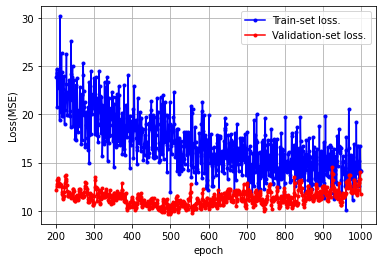

In [13]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len[200:], loss[200:], marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len[200:], val_loss[200:], marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

In [14]:
# Prediction on test data
model.predict(test_data)

array([[22.212381 ],
       [26.067268 ],
       [24.207006 ],
       [ 7.619013 ],
       [18.496294 ],
       [18.612309 ],
       [22.761572 ],
       [20.642017 ],
       [20.991316 ],
       [20.151075 ],
       [12.315287 ],
       [11.020914 ],
       [15.786724 ],
       [ 7.7793236],
       [33.46665  ],
       [34.1523   ],
       [22.609842 ],
       [36.4667   ],
       [30.439707 ],
       [21.18995  ],
       [23.013155 ],
       [19.404589 ],
       [20.828434 ],
       [25.169136 ],
       [21.274588 ],
       [27.501398 ],
       [17.336348 ],
       [14.876791 ],
       [40.098564 ],
       [17.278906 ],
       [15.014515 ],
       [17.0095   ],
       [19.832306 ],
       [19.027037 ],
       [27.550413 ],
       [22.277126 ],
       [ 5.7823296],
       [38.855824 ],
       [12.200645 ],
       [15.615203 ],
       [22.368101 ],
       [22.401356 ],
       [18.551626 ],
       [17.684534 ],
       [19.50022  ],
       [24.1262   ],
       [19.895212 ],
       [10.65

In [15]:
sample_data = np.array([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

In [16]:
sample_data = sc.transform(sample_data)
model.predict(sample_data)

array([[24.1262]], dtype=float32)